In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
data =  'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [17]:
!wget $data

--2025-11-04 17:34:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-11-04 17:34:22 (169 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [18]:
df=pd.read_csv(data)

In [19]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [31]:
df.num_doors.value_counts()

num_doors
 0.0    4053
 1.0    2192
-1.0    2183
-2.0     594
 2.0     563
 3.0      58
-3.0      56
-4.0       4
 4.0       1
Name: count, dtype: int64

In [20]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [21]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [32]:
num=['engine_displacement','num_cylinders','horsepower','vehicle_weight','acceleration','model_year','num_doors']
cat=['origin','fuel_type','drivetrain']

In [22]:
df.columns


Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [23]:
for c in ['num_cylinders','horsepower','acceleration','num_doors']:
    df[c].fillna(0,inplace=True)
    

/tmp/ipykernel_7601/2431097215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(0,inplace=True)


In [24]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = (df_train.fuel_efficiency_mpg).values
y_val = (df_val.fuel_efficiency_mpg).values
y_test = (df_test.fuel_efficiency_mpg).values

In [28]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [29]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [34]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

val_test = df_test.to_dict(orient='records')
X_test = dv.transform(val_test)

In [39]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

names = dv.get_feature_names_out().tolist()
print(names)

['acceleration', 'drivetrain=All-wheel drive', 'drivetrain=Front-wheel drive', 'engine_displacement', 'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower', 'model_year', 'num_cylinders', 'num_doors', 'origin=Asia', 'origin=Europe', 'origin=USA', 'vehicle_weight']


In [40]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



Question 2
Train a random forest regressor with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on the validation data?

0.045
0.45
4.5
45.0

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred)).round(2)


np.float64(0.46)

In [51]:
scores=[]
for n in range(10,201,10):
    rf=RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)

    y_pred = rf.predict(X_val)
    score=np.sqrt(mean_squared_error(y_val, y_pred)).round(3)

    scores.append((n,score))
    

In [52]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

In [53]:
df_scores

,n_estimators,rmse
0,10,0.460
1,20,0.454
2,30,0.451
3,40,0.448
4,50,0.446
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.444


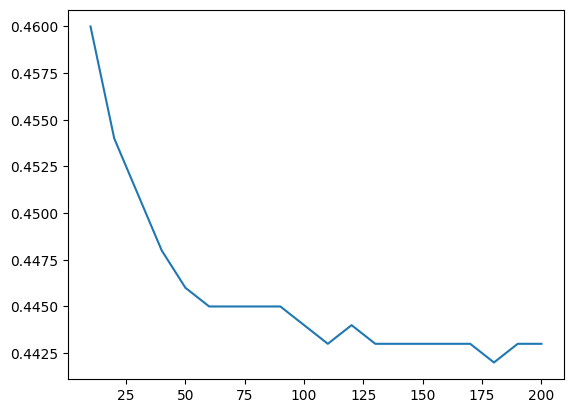

In [54]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [61]:
scores={}
for d in [10, 15, 20, 25]:
    for n in range(10,201,10):
        s=[]
        rf=RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1,max_depth=d)
        rf.fit(X_train,y_train)

        y_pred = rf.predict(X_val)
        score=np.sqrt(mean_squared_error(y_val, y_pred)).round(3)

        s.append(score)
    scores[d] = np.mean(s)
    print(f'for {d} value of rmse {scores[d]}')

for 10 value of rmse 0.44
for 15 value of rmse 0.442
for 20 value of rmse 0.443
for 25 value of rmse 0.443


In [62]:
rf = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
features = list(zip(df_train.columns, importances))
features = [x for x in features if x[0] in ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']]
features_sorted = sorted(features, key=lambda x: x[1], reverse=True)
for name, val in features_sorted:
    print(f"{name}: {val:.4f}")

engine_displacement: 0.0115
vehicle_weight: 0.0033
acceleration: 0.0003
horsepower: 0.0003


In [63]:

!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 55.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 39.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [64]:
import xgboost as xgb

In [65]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [71]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=100,
        evals=watchlist
    )

y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"eta -> RMSE={rmse:.4f}")

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35353
[2]	train-rmse:0.98120	val-rmse:1.01316
[3]	train-rmse:0.75443	val-rmse:0.78667
[4]	train-rmse:0.60680	val-rmse:0.64318
[5]	train-rmse:0.51381	val-rmse:0.55664
[6]	train-rmse:0.45470	val-rmse:0.50321
[7]	train-rmse:0.41881	val-rmse:0.47254
[8]	train-rmse:0.39534	val-rmse:0.45509
[9]	train-rmse:0.38038	val-rmse:0.44564
[10]	train-rmse:0.37115	val-rmse:0.43896
[11]	train-rmse:0.36361	val-rmse:0.43594
[12]	train-rmse:0.35850	val-rmse:0.43558
[13]	train-rmse:0.35365	val-rmse:0.43394
[14]	train-rmse:0.35025	val-rmse:0.43349
[15]	train-rmse:0.34666	val-rmse:0.43362
[16]	train-rmse:0.34459	val-rmse:0.43378
[17]	train-rmse:0.34128	val-rmse:0.43405
[18]	train-rmse:0.33822	val-rmse:0.43391
[19]	train-rmse:0.33709	val-rmse:0.43374
[20]	train-rmse:0.33553	val-rmse:0.43376
[21]	train-rmse:0.33243	val-rmse:0.43453
[22]	train-rmse:0.33031	val-rmse:0.43510
[23]	train-rmse:0.32815	val-rmse:0.43601
[24]	train-rmse:0.32670	va

In [73]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

NameError: name 'df_score' is not defined

In [72]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=100,
        evals=watchlist
    )

y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"eta -> RMSE={rmse:.4f}")

[0]	train-rmse:2.28944	val-rmse:2.34561
[1]	train-rmse:2.07396	val-rmse:2.12434
[2]	train-rmse:1.88066	val-rmse:1.92597
[3]	train-rmse:1.70730	val-rmse:1.74987
[4]	train-rmse:1.55163	val-rmse:1.59059
[5]	train-rmse:1.41247	val-rmse:1.44988
[6]	train-rmse:1.28796	val-rmse:1.32329
[7]	train-rmse:1.17660	val-rmse:1.20930
[8]	train-rmse:1.07736	val-rmse:1.10830
[9]	train-rmse:0.98883	val-rmse:1.02009
[10]	train-rmse:0.91008	val-rmse:0.94062
[11]	train-rmse:0.84030	val-rmse:0.87100
[12]	train-rmse:0.77874	val-rmse:0.80916
[13]	train-rmse:0.72417	val-rmse:0.75465
[14]	train-rmse:0.67626	val-rmse:0.70780
[15]	train-rmse:0.63402	val-rmse:0.66672
[16]	train-rmse:0.59690	val-rmse:0.63062
[17]	train-rmse:0.56447	val-rmse:0.60016
[18]	train-rmse:0.53619	val-rmse:0.57383
[19]	train-rmse:0.51138	val-rmse:0.55044
[20]	train-rmse:0.48983	val-rmse:0.53064
[21]	train-rmse:0.47135	val-rmse:0.51451
[22]	train-rmse:0.45501	val-rmse:0.49998
[23]	train-rmse:0.44120	val-rmse:0.48790
[24]	train-rmse:0.42929	va